# Exercises in Classification II

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model
import matplotlib.ticker as ticker

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Exercise 1

In this exercise, we look at the titanic dataset, which is on Moodle in the file "titanic_survival_data.csv". 

Answer the following questions:
1. Load in the dataset, replace the missing values in the age column by the mean age of the column, and encode the Sex column as 0 and 1s.
2. Make an X set of the variables "Pclass", "Sex", "Age" and "SibSp", and take Survived as the y variable. Then make train-test split with 20% of the dataset for testing.
3. Do MinMax scaling on the training dataset.
5. Use 10-fold cross-validation on the training set to train different KNN algorithms and chose a suitable K based on accuracy score.
6. For the chosen K, train a model on the entire training dataset.
7. Create a confusion matrix for the model trained in 4 and calculate accuracy, precision, recall, and F1 score on the test dataset.
8. OPTIONAL: Create a ROC curve for the test dataset as well as the AUC score
9. OPTIONAL: Can you use 10-fold cross validation to get an estimate of the recall instead of accuracy?

## Exercise 2

In this exercise, we will predict the two income classes in the adult dataset (The file "adult.csv" is also on Moodle). 

Answer the following questions:
1. Clean the `income` variable such that it has only two values
2. Select as set of minimum two feature variables you want to use to predict `income`. Do the necessary transformation of these variables.
3. Create X and y dataset and split the datasets into training and testing sets
4. Train a KNN classifier to predict the variable `income` based on the feature variables selected in 2 - try out some different Ks 
5. Train a logistic regression classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the KNN classifier.
6. Train a decision tree classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
7. Train a random forest classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.
8. Train a AdaBoost classifier to predict the variable `income` based on the feature variables selected in 2 and compare it to the previous classifiers.

### 1. Load in the dataset, replace the missing values in the age column by the mean age of the column, and encode the Sex column as 0 and 1s.

In [328]:
df_titan = pd.read_csv("../Notebooks and data-8/titanic_survival_data.csv")
df_titan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.000,S
887,1,1,female,19.0,0,0,30.000,S
888,0,3,female,NaN,1,2,23.450,S
889,1,1,male,26.0,0,0,30.000,C


In [329]:
df_titan.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,868.000000
mean,0.383838,2.308642,29.679272,0.523008,0.381594,91.288425
std,0.486592,0.836071,14.536483,1.102743,0.806057,159.991488
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,10.500000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,27.825000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,78.958000
max,1.000000,3.000000,80.000000,8.000000,6.000000,910.792000


In [330]:
df_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      868 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [331]:
df_titan.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare         23
Embarked      2
dtype: int64

In [332]:
df_titan["Age"].mean()

29.679271708683473

In [333]:
df_titan["Age"].fillna(df_titan["Age"].mean()) # not need to assign

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.679272
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [334]:
df_titan["Sex"] = pd.get_dummies(df_titan["Sex"], drop_first=True, dtype=int)

In [335]:
#print(df_titan.duplicated().sum())  # it is allowed to have duplicates
#df_titan = df_titan.drop_duplicates()
#print(df_titan.duplicated().sum())

In [336]:
print(df_titan.isna().sum())
df_titan = df_titan.dropna()
print(df_titan.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare         23
Embarked      2
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [337]:
df_titan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.250,S
1,1,1,0,38.0,1,0,712.833,C
2,1,3,0,26.0,0,0,7.925,S
3,1,1,0,35.0,1,0,53.100,S
4,0,3,1,35.0,0,0,8.050,S
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.125,Q
886,0,2,1,27.0,0,0,13.000,S
887,1,1,0,19.0,0,0,30.000,S
889,1,1,1,26.0,0,0,30.000,C


In [338]:
df_titan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.250,S
1,1,1,0,38.0,1,0,712.833,C
2,1,3,0,26.0,0,0,7.925,S
3,1,1,0,35.0,1,0,53.100,S
4,0,3,1,35.0,0,0,8.050,S
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.125,Q
886,0,2,1,27.0,0,0,13.000,S
887,1,1,0,19.0,0,0,30.000,S
889,1,1,1,26.0,0,0,30.000,C


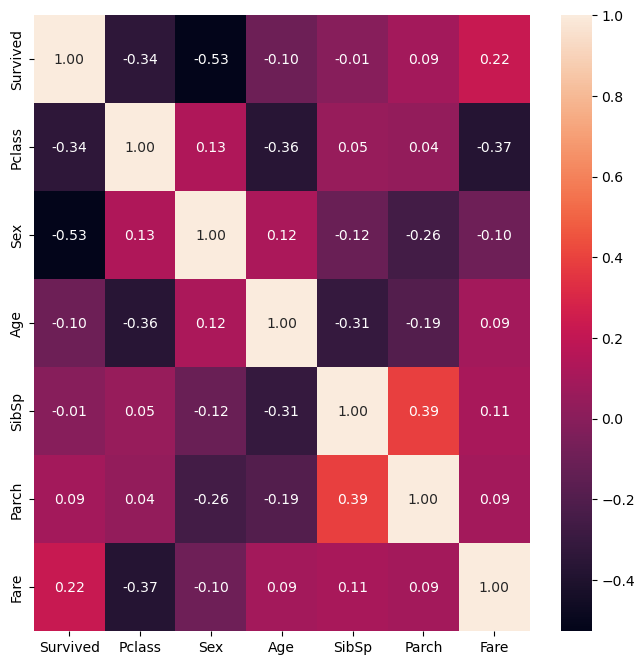

In [339]:
fig = plt.figure(figsize=(8, 8))
sns.heatmap(df_titan.drop(["Embarked"], axis=1).corr(), annot=True, fmt=".2f")
plt.show()

### 2. Make an X set of the variables "Pclass", "Sex", "Age" and "SibSp", and take Survived as the y variable. Then make train-test split with 20% of the dataset for testing.

In [341]:
X = df_titan[["Pclass", "Sex", "Age", "SibSp"]]
X.head(5)

,Pclass,Sex,Age,SibSp
0,3,1,22.0,1
1,1,0,38.0,1
2,3,0,26.0,0
3,1,0,35.0,1
4,3,1,35.0,0


In [342]:
y = df_titan["Survived"]
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [343]:
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X, y, test_size=0.2, random_state=123)

### 3. Do MinMax scaling on the training dataset.

In [345]:
scaler = MinMaxScaler()

In [346]:
X_titanic_train_scaled = pd.DataFrame(scaler.fit_transform(X_titanic_train), columns=X_titanic_train.columns)
X_titanic_train_scaled

,Pclass,Sex,Age,SibSp
0,0.5,1.0,0.2875,0.0
1,0.0,0.0,0.2125,0.2
2,0.0,0.0,0.2750,0.2
3,1.0,1.0,0.3125,0.2
4,1.0,1.0,0.1750,1.0
...,...,...,...,...
548,1.0,1.0,0.3000,0.0
549,0.5,0.0,0.4250,0.2
550,0.0,1.0,0.8875,0.0
551,0.5,0.0,0.4125,0.2


In [347]:
#X_titanic_test = pd.DataFrame(scaler.transform(X_titanic_test), columns=X_titanic_test.columns)
#X_titanic_test # it only says to do the training on the training dataset
# I have seen people say fit_transform on the training and then say transform on the test, is this what should be done here

# in the K-nearest neighbors example we do the scaling before the train_test_split, so both train and test are scaled
# when the cross validation is done, do you still train using scaling on the training dataset?

### 4. Use 10-fold cross-validation on the training set to train different KNN algorithms and chose a suitable K based on accuracy score.

In [349]:
#one_d_original = y["Survived"]

In [350]:
#one_d = y_titanic_train["Survived"]

In [351]:
def knnSweepCrossValidation(X, y, maxK, folds=5):
    kacclist = []
    
    for k in range(2, maxK):
        knn = KNeighborsClassifier(n_neighbors=k)     
        scores = cross_val_score(knn, X, y, cv = folds)
        kacclist.append({"K": k, "CV accuracy": scores.mean()})

    return pd.DataFrame(kacclist)

In [352]:
CV_acuracy_data = knnSweepCrossValidation(X_titanic_train_scaled, y_titanic_train, 25, 10) # MUST be on the training data

In [353]:
CV_acuracy_data

,K,CV accuracy
0,2,0.799123
1,3,0.815617
2,4,0.804708
3,5,0.810032
4,6,0.799286
5,7,0.806461
6,8,0.788377
7,9,0.793799
8,10,0.779318
9,11,0.801039


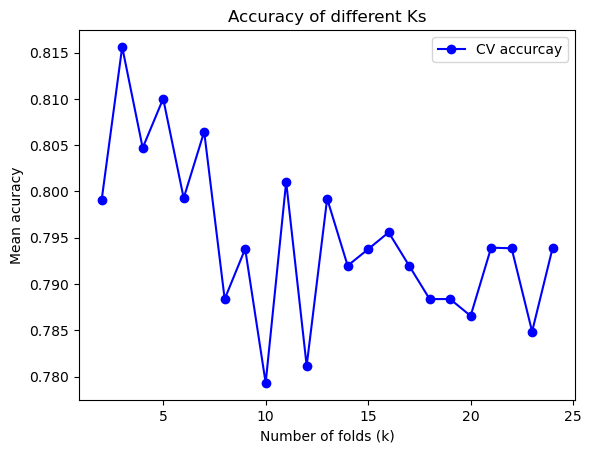

In [354]:
plt.plot(CV_acuracy_data["K"], CV_acuracy_data["CV accuracy"], label = "CV accurcay", color='blue', marker='o', linestyle='solid')    
plt.xlabel('Number of folds (k)')
plt.ylabel('Mean acuracy')
plt.title("Accuracy of different Ks")
plt.legend()

plt.show()

In [355]:
CV_acuracy_data[CV_acuracy_data["CV accuracy"] == CV_acuracy_data["CV accuracy"].max()]

,K,CV accuracy
1,3,0.815617


### 5. For the chosen K, train a model on the entire training dataset.

In [357]:
best_k = CV_acuracy_data[CV_acuracy_data["CV accuracy"] == CV_acuracy_data["CV accuracy"].max()]["K"][1]
best_k

3

In [358]:
knn_best_k = KNeighborsClassifier(n_neighbors=best_k)

In [439]:
knn_best_k.fit(X_titanic_train, y_titanic_train)

KNeighborsClassifier(n_neighbors=3)

In [360]:
X_titanic_train

,Pclass,Sex,Age,SibSp
733,2,1,23.0,0
307,1,0,17.0,1
151,1,0,22.0,1
353,3,1,25.0,1
683,3,1,14.0,5
...,...,...,...,...
127,3,1,24.0,0
416,2,0,34.0,1
493,1,1,71.0,0
472,2,0,33.0,1


In [361]:
X_titanic_test

,Pclass,Sex,Age,SibSp
544,1,1,50.0,1
321,3,1,27.0,0
514,3,1,24.0,0
243,3,1,22.0,0
343,2,1,25.0,0
...,...,...,...,...
605,3,1,36.0,1
429,3,1,32.0,0
673,2,1,31.0,0
627,1,0,21.0,0


In [441]:
y_pred_train = knn_best_k.predict(X_titanic_train) ## do the test on the normal or scalled data?

In [443]:
y_pred_test = knn_best_k.predict(X_titanic_test) # look Evaluating classification

In [445]:
assembled_titanic_train = X_titanic_train
assembled_titanic_train["Survived"] = y_pred_train

In [447]:
assembled_titanic_test = X_titanic_test
assembled_titanic_test["Survived"] = y_pred_test

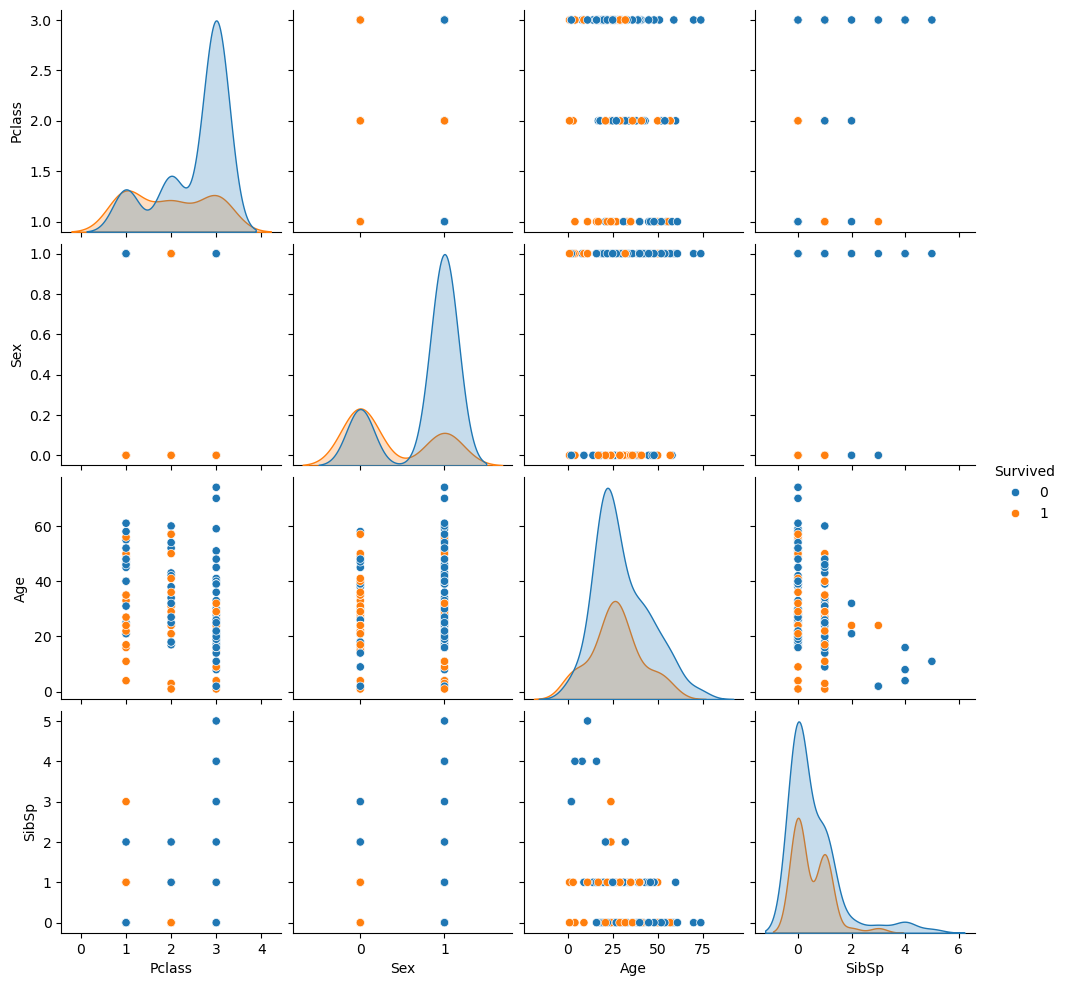

In [449]:
sns.pairplot(assembled_titanic_test, hue="Survived")

<Axes: xlabel='Pclass', ylabel='count'>

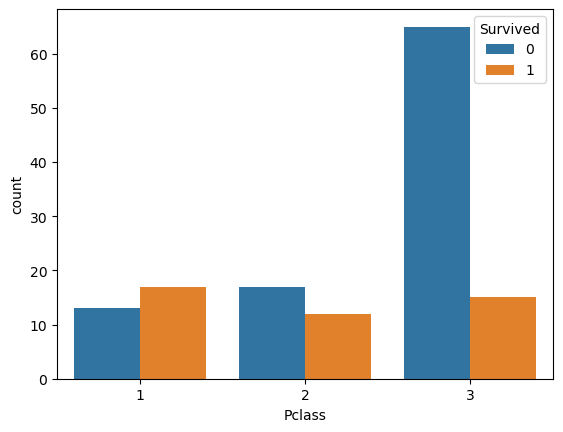

In [451]:
sns.countplot(assembled_titanic_test, x="Pclass", hue="Survived")

<Axes: xlabel='Pclass', ylabel='count'>

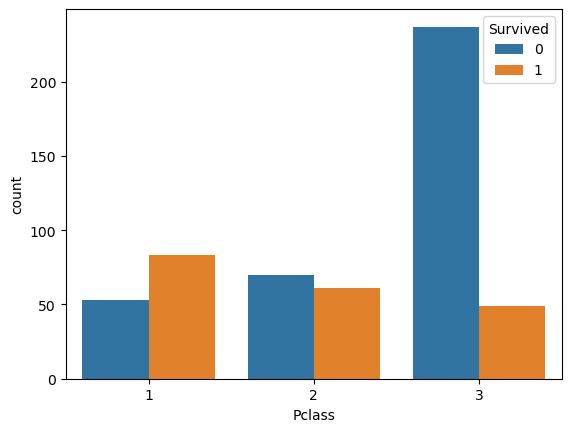

In [368]:
sns.countplot(assembled_titanic_train, x="Pclass", hue="Survived")

<Axes: xlabel='Sex', ylabel='count'>

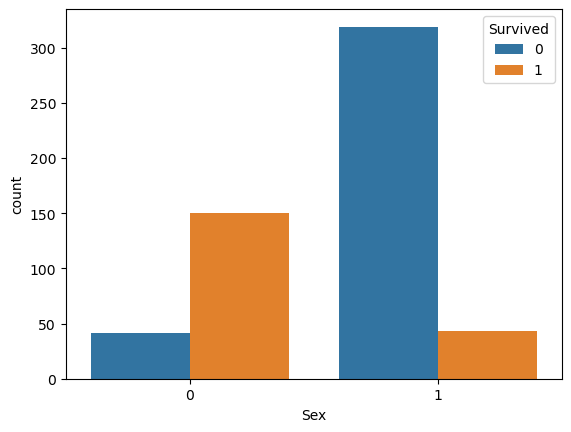

In [369]:
sns.countplot(assembled_titanic_train, x="Sex", hue="Survived")

<Axes: xlabel='Age', ylabel='count'>

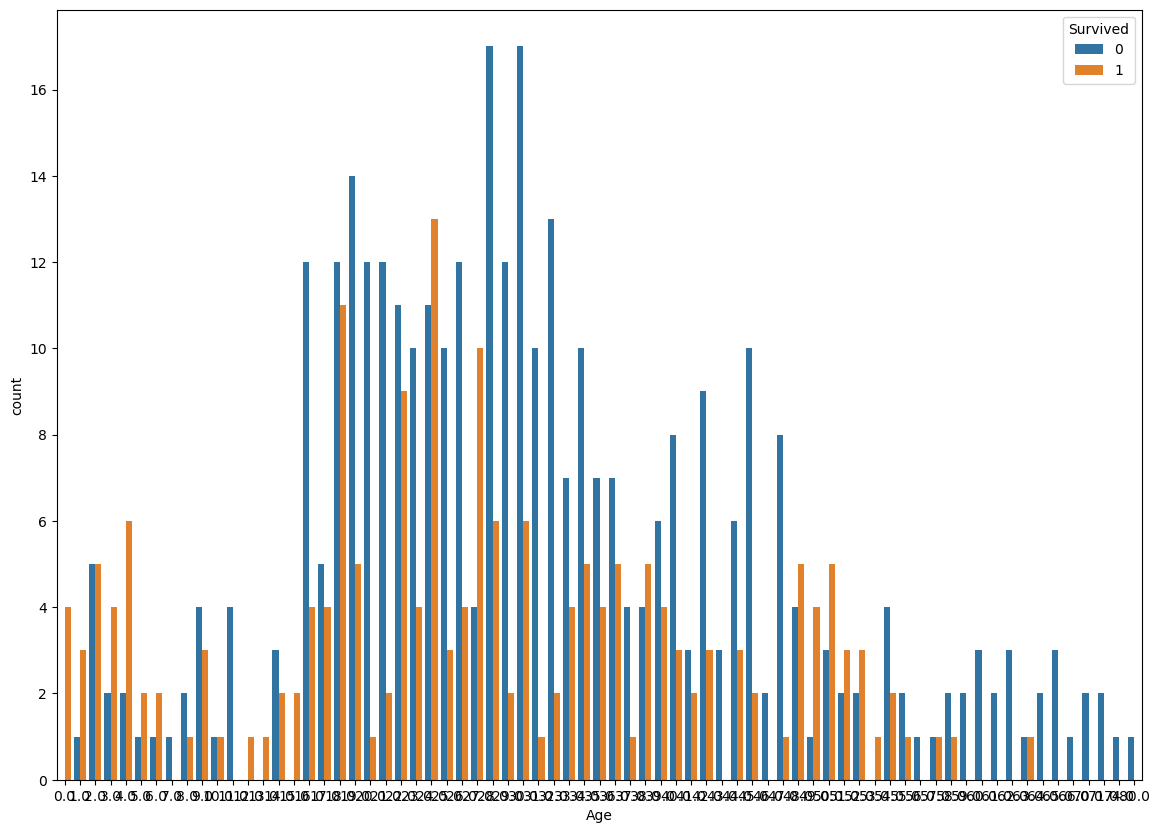

In [370]:
fig = plt.figure(figsize=(14, 10))

"""plt.xticks(fontsize=10) # should potentionally transform the date to only show the day and hour, or display hours in increment hour1, hour2...
ax = plt.gca()  # Get the current axes
tick_positions = assembled_titanic_train["Age"].value_counts()  # The exact locations where you want ticks
locator = ticker.FixedLocator(tick_positions)
ax.xaxis.set_major_locator(locator)"""

sns.countplot(assembled_titanic_train, x=assembled_titanic_train["Age"], hue="Survived")

<Axes: xlabel='Survived', ylabel='Age'>

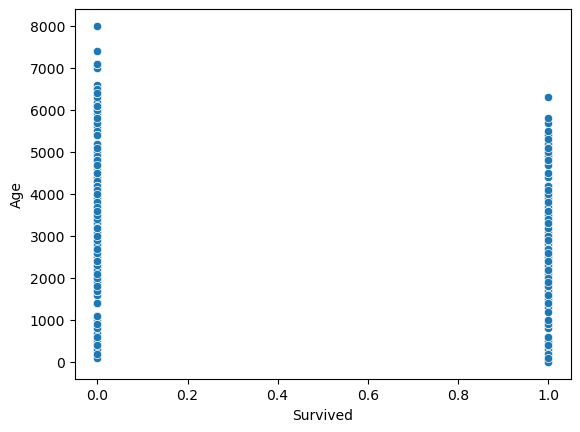

In [371]:
#sns.countplot(assembled_titanic_train, x="Sex", hue="Survived")

sns.scatterplot(assembled_titanic_train, x="Survived", y=assembled_titanic_train["Age"] * 100)

### 6. Create a confusion matrix for the model trained in 4 and calculate accuracy, precision, recall, and F1 score on the test dataset.

In [373]:
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X, y, test_size=0.2, random_state=42)

    remove normalize='all', to get the total values and not %

### Training data

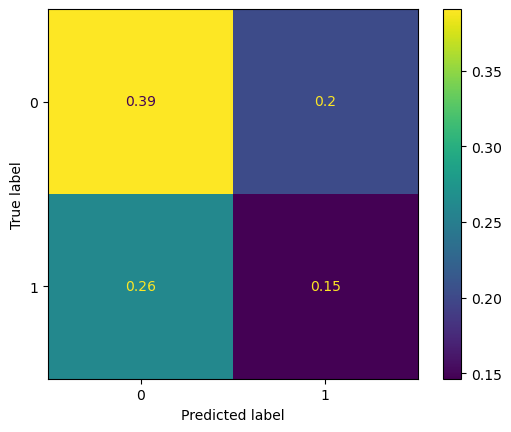

In [376]:
ConfusionMatrixDisplay(confusion_matrix(y_titanic_train, y_pred_train, normalize='all')).plot()
plt.show()

### Testing data

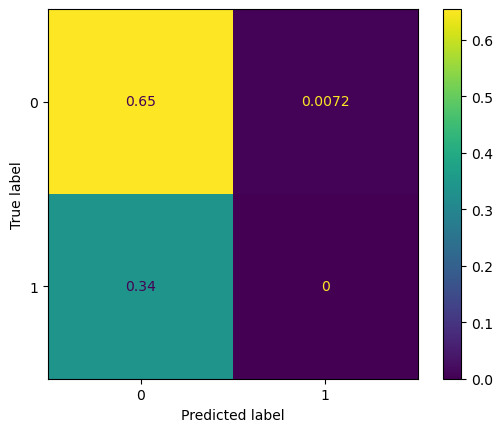

In [378]:
ConfusionMatrixDisplay(confusion_matrix(y_titanic_test, y_pred_test, normalize='all')).plot()
plt.show()

In [379]:
EvaluationScoreDF = pd.DataFrame({"K": ["train", "test"],
                                  "Accuracy": [accuracy_score(y_titanic_train, y_pred_train), accuracy_score(y_titanic_test, y_pred_test)],
                                  "Precision": [precision_score(y_titanic_train, y_pred_train), precision_score(y_titanic_test, y_pred_test)],
                                  "Recall": [recall_score(y_titanic_train, y_pred_train), recall_score(y_titanic_test, y_pred_test)],
                                  "F1": [f1_score(y_titanic_train, y_pred_train), f1_score(y_titanic_test, y_pred_test)]})
EvaluationScoreDF   

,K,Accuracy,Precision,Recall,F1
0,train,0.537071,0.419689,0.36,0.38756
1,test,0.654676,0.000000,0.00,0.00000


### 7. OPTIONAL: Create a ROC curve for the test dataset as well as the AUC score

In [381]:
logit_model = linear_model.LogisticRegression()

In [382]:
logit_model.fit(X_titanic_train, y_titanic_train)

LogisticRegression()

In [383]:
y_probs = logit_model.predict_proba(X_titanic_test)[:,1]
y_pred = logit_model.predict(X_titanic_test)

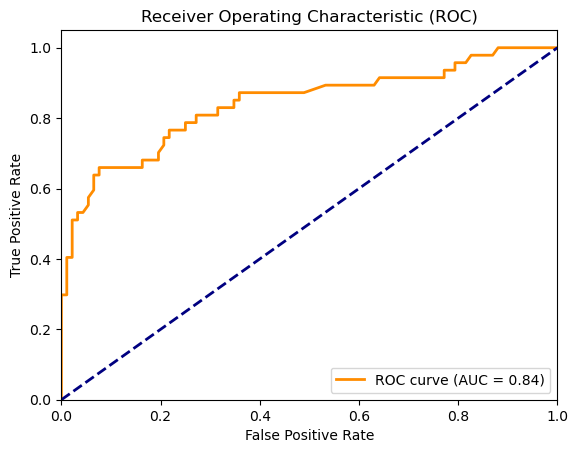

In [384]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_titanic_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [385]:
roc_auc_score(y_titanic_test, y_probs)

0.8404255319148937

### 8. OPTIONAL: Can you use 10-fold cross validation to get an estimate of the recall instead of accuracy?

In [387]:
# is this a yes or no answer?
# I don't quite understand the question
# Can't see why you wouldn't be able to get the recall data instead of the accuracy

# TODO, check out this question